# Probando Clasificación con Gradiente descendente

In [20]:
import numpy as np
import matplotlib.pyplot as plt

**Generando dos clases sintéticas con medias $\mu_0 \neq \mu_1$**

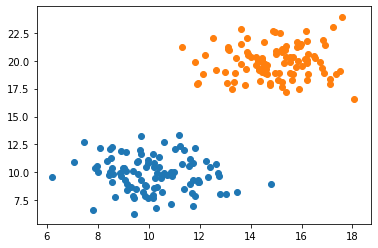

In [21]:
mean00 = [10,10]
mean01 = [15,20]

cov00 = [[2,0],[0,2]]
cov01 = [[2,0],[0,2]]

class00 = np.random.multivariate_normal(mean00, cov00, size=100, check_valid='warn', tol=1e-8)
class01 = np.random.multivariate_normal(mean01, cov01, size=100, check_valid='warn', tol=1e-8)

plt.scatter(class00[:,0],class00[:,1])
plt.scatter(class01[:,0],class01[:,1])

**Generando una sola base de datos de datos clasificados**

In [23]:
zeros = np.zeros(len(class00)).T
labeled_class00 = np.append(class00,np.transpose([zeros]),axis=1)
labeled_class01 = np.append(class01,np.transpose([zeros])+1,axis=1)
labeled_classes = np.append(labeled_class00,labeled_class01,axis=0)

Definimos nuestra función de "costo". Decidimos implementar la derivada de la verosimilitud 

$\frac{\partial LL(\theta)}{\partial \theta_j} = \sum_{i=1}^n [y_i-sigm(\theta^T\mathbf{x}_i)]x_j$

In [24]:
#def pd(x,y,a):
#    s = 0    
#    for i in np.arange(len(x)):
#        dif = ((y[i]-a*x[i]))
#        s = s + dif*(x[i])
#    return s

**Utilizando modelo con Bias**
        
$\mathbf{wx}_i+w_0=0$

$x_0w_0$ con $x_0 =  1$

**Modelo sin entrenar**

In [39]:
#inicializar parametros theta
param = np.ones(np.shape(labeled_classes)[1]-1)

#inicializar w_0 (bias)
bias = 20

Antes de encontrar los parámetros que nos maximicen la probabilidad de clasificar correctamente

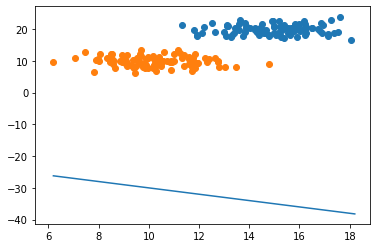

In [40]:
hmin = np.min([class00[:,0],class01[:,0]])
hmax = np.max([class00[:,0],class01[:,0]])+1
X = np.arange(hmin,hmax)
Y = (-param[0]/param[1])*X-(bias/param[1])
plt.plot(X,Y)
plt.scatter(class01[:,0],class01[:,1])
plt.scatter(class00[:,0],class00[:,1])
plt.show()

In [41]:
#Ecuación de la sigmoide
sigm = lambda x: 1/(1 + np.exp(-x))

def f(x,bias=bias):
    return sigm(np.matmul(x,param)+bias)

pred = (np.array(list(map(f,labeled_classes[:,0:-1])))>0.5)*1
print("Errores de clasificación:", np.sum((pred - labeled_classes[:,-1])**2))

Errores de clasificación: 100.0


In [42]:
n = 0.01


#inicializar parametros theta


#inicializar w_0 (bias)
bias = 0

x = param

#repetir varias veces
for k in range(1500):
    
    #inicializar gradiente parametros + bias
    g = np.zeros(len(param)+1)

    #por cada tupla (x,y)
    for v in labeled_classes:
    
        #asignamos la pareja (o tupla) (x_i,y_i)
        x = v[:2]
        y = v[2]
        
        # por cada parametro
        line = np.matmul(x,param)+bias
        for j in np.arange(len(x)):
    
            #gradiente evaluado con respecto a w_1 y w_2 en la derivada de la funcion de log-verosimilitud
            g[j]+=(y-sigm(line))*x[j]

        
        #gradiente evaluado con respecto a w_0
        g[2] += (y-sigm(line))*1

        
    #actualización de los parámetros
    param += n*g[:2]
    bias += n*g[2]

    
print("parametros w_1 y w_2",+param)    
print("w_0 (bias)",bias)

parametros w_1 y w_2 [-2.5865243   9.51842089]
w_0 (bias) -106.33832592634522


In [43]:
#Ecuación de la sigmoide

def f(x,bias=bias):
    return sigm(np.matmul(x,param)+bias)

pred = (np.array(list(map(f,labeled_classes[:,0:2])))>0.5)*1
print("Errores de clasificación:", np.sum((pred - labeled_classes[:,2])**2))

Errores de clasificación: 0.0


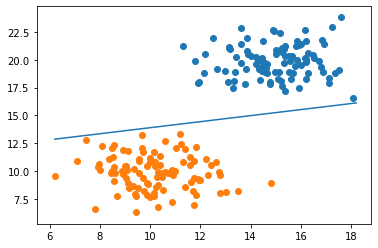

In [44]:
hmin = np.min([class00[:,0],class01[:,0]])
hmax = np.max([class00[:,0],class01[:,0]])+1
X = np.arange(hmin,hmax)
Y = (-param[0]/param[1])*X-(bias/param[1])
plt.plot(X,Y)
plt.scatter(class01[:,0],class01[:,1])
plt.scatter(class00[:,0],class00[:,1])
plt.show()